In [ ]:
'''
Types of Probability Distribution
'''


# 1. Bernoulli Distribution


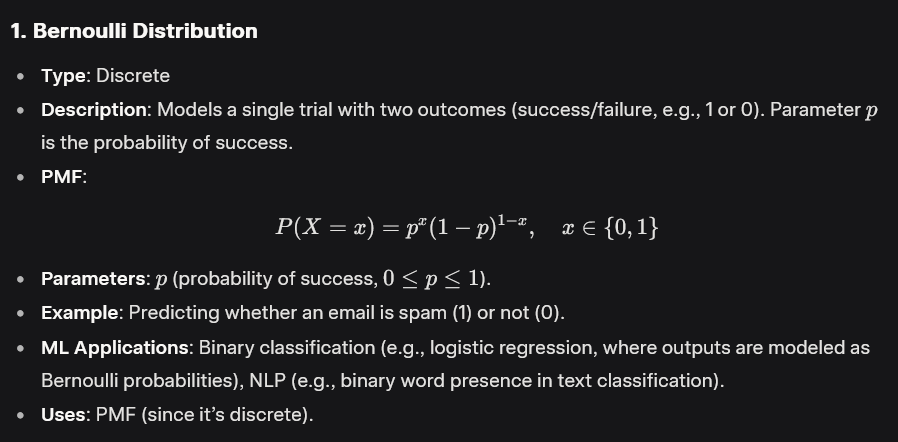


For a **Bernoulli distribution** with success probability `p`, the statistical properties are:

##### 🔸 Mean:
- $\mu$ = p

##### 🔸 Variance:
- $\sigma^2$ = p(1 - p)

##### 🔸 Median:
- 0 if \( p < 0.5 \)  
- 1 if \( p > 0.5 \)  
- Either 0 or 1 if \( p = 0.5 \)

##### 🔸 Mode:
- 0 if \( p < 0.5 \)  
- 1 if \( p > 0.5 \)  
- Both 0 and 1 if \( p = 0.5 \)

> ✅ The Bernoulli distribution models a single binary experiment (success/failure, yes/no, 1/0) and is a special case of the Binomial distribution with `n = 1`.


In [1]:
'''
Example code Bernoulli Dist
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
# define probability of success
p = 0.6

# bernolli outcomes
x = [0,1]

# PMF values
pmf = [bernoulli.pmf(k,p) for k in x]
pmf

[np.float64(0.4000000000000001), np.float64(0.6)]

Mean: 0.57
Median: 1.0
Mode: 1


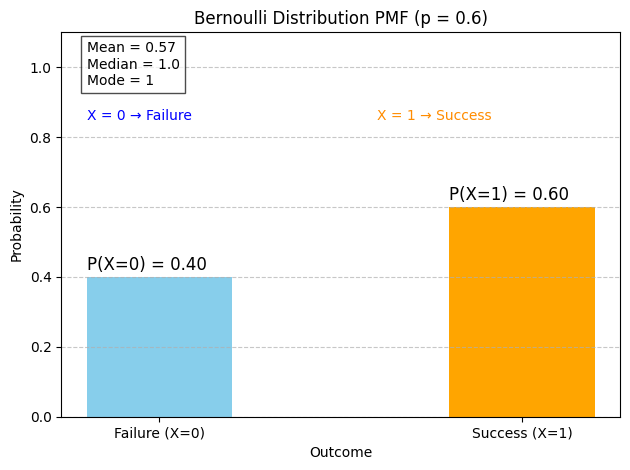

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, mode

# Define probability of success
p = 0.6

# Bernoulli outcomes: 0 and 1
x = [0, 1]
pmf = [bernoulli.pmf(k, p) for k in x]

# Generate 1000 samples for empirical stats
samples = bernoulli.rvs(p, size=1000)

# Calculate mean, median, mode
mean_val = np.mean(samples)
median_val = np.median(samples)
mode_val = mode(samples, keepdims=True).mode[0]

# Print them
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")

# Plot PMF with annotation
plt.bar(x, pmf, width=0.4, color=['skyblue', 'orange'])
plt.xticks(x, ['Failure (X=0)', 'Success (X=1)'])
plt.title(f"Bernoulli Distribution PMF (p = {p})")
plt.xlabel('Outcome')
plt.ylabel('Probability')

# Annotate bars
for i, v in enumerate(pmf):
    plt.text(x[i] - 0.2, v + 0.02, f'P(X={x[i]}) = {v:.2f}', fontsize=12)

# Annotate meanings
plt.text(-0.2, 0.85, 'X = 0 → Failure', fontsize=10, color='blue')
plt.text(0.6, 0.85, 'X = 1 → Success', fontsize=10, color='darkorange')

# Show Mean, Median, Mode in plot
plt.text(-0.2, 0.95, f"Mean = {mean_val:.2f}\nMedian = {median_val}\nMode = {mode_val}", 
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Binomial Distribution

In [ ]:
'''
Binomial Distribution:

Definition:
    Discrete Probability distribution that models the number of successes in a fixed number of independent
    Bernoilli trials, each with the same probability of success

Type:
    Discrete Distribution
    Models count data: number of successes in n trials

Parameters:
    n = number of trials = total number of experiments (fixed)
    p = prob. of success = prob. of success on a single trial
    q = 1-p = pro. of failure = Complement of success

Support:
    X ϵ {0,1,2,3,..,n}

Use case:
    A/B Testing: No of user who clicked on version A out of n users
    Quality Control : Number of defective items in a batch of size n
    Survey Sampling : Number of people who answered "yes" in a sample
    Sports Analytics : No of successful free throws in 10 attempts
'''


Mathematical Formula (PMF) for Binomial
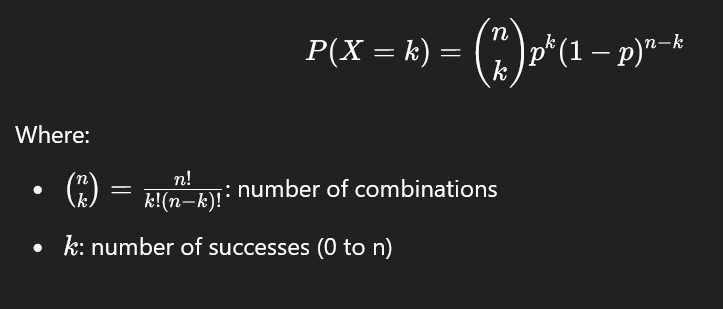
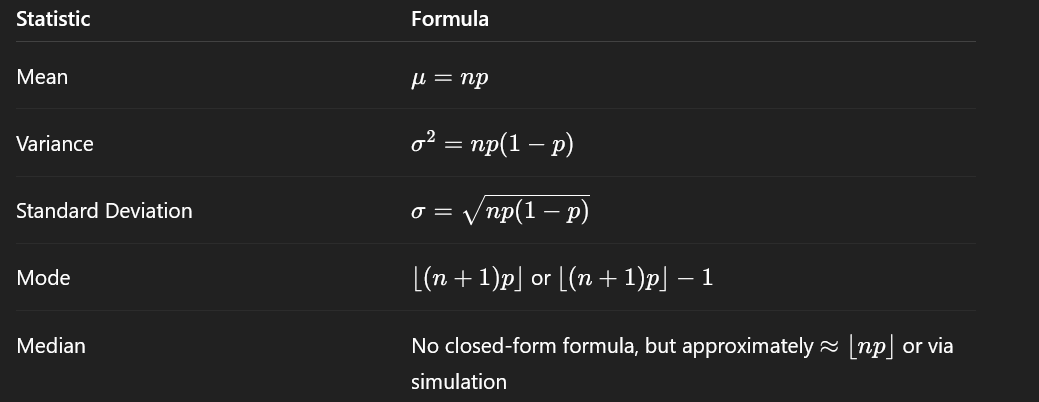

In [24]:
# Code example of Binomial Distribution:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,mode

n = 5
p = 0.5

#support range
x = np.arange(0,n+1)

#PMF (Prob. Mass Func)
pmf = binom.pmf(x,n,p)
pmf


array([0.03125, 0.15625, 0.3125 , 0.3125 , 0.15625, 0.03125])

In [32]:
#stats
mean_val = binom.mean(n,p)
median_val = binom.median(n,p)
std_val = binom.std(n,p)
var_val = binom.var(n,p)

# Print stats
print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Variance: {var_val}")
print(f"Standard Deviation: {std_val}")


Mean: 2.5
Median: 2.0
Variance: 1.25
Standard Deviation: 1.118033988749895


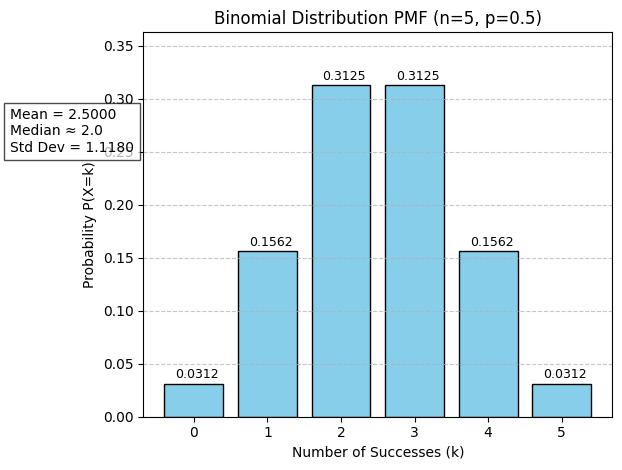

Q1. Prob. of getting exactly 3 heads in 5 flips? n=5, k=3 
-> then Pr(X=3) = PMF(X=3) = 0.3125 


In [33]:
# Plotting
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution PMF (n={n}, p={p})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
for i, v in zip(x, pmf):
    plt.text(i-0.25, v+0.005, f'{v:.4f}', fontsize=9)

# Display stats on plot
plt.text(n/2 - 5, max(pmf)*0.8,
         f'Mean = {mean_val:.4f}\nMedian ≈ {median_val}\nStd Dev = {std_val:.4f}',
         bbox=dict(facecolor='white', alpha=0.7), fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(pmf) + 0.05)
plt.tight_layout()
plt.show()
print("Q1. Prob. of getting exactly 3 heads in 5 flips? n=5, k=3 " \
"\n-> ""then Pr(X=3) = PMF(X=3) = 0.3125 ")



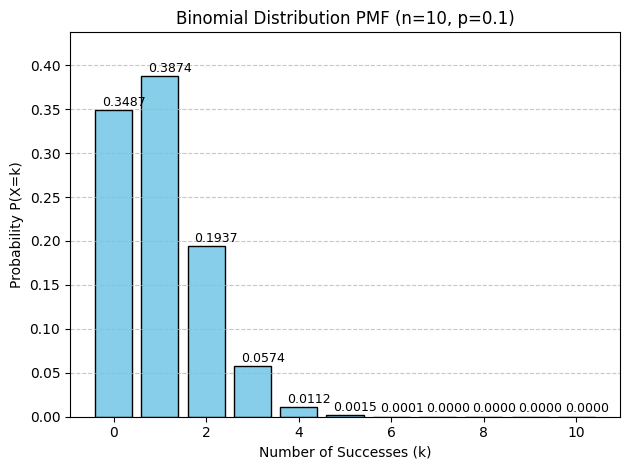

Q. Prob. of finding exactly 2 defective items in a sample of 10?
 Soln = P(X=2) = same formula = 0.1937


In [39]:
"""
Scenario. Inspecting 10 tems in a factory where each item has a 10% chance of being defective

n = 10
p = 0.1(being defective)
k = {0...10} (varies no of sucess)

Q. Prob. of finding exactly 2 defective items in a sample of 10?
Soln = P(X=2) = same form = 0.1937
"""
# Plotting
# Code example of Binomial Distribution:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom,mode

n = 10
p = 0.1

#support range
x = np.arange(0,n+1)

#PMF (Prob. Mass Func)
pmf = binom.pmf(x,n,p)
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution PMF (n={n}, p={p})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability P(X=k)')
for i, v in zip(x, pmf):
    plt.text(i-0.25, v+0.005, f'{v:.4f}', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(pmf) + 0.05)
plt.tight_layout()
plt.show()
print("Q. Prob. of finding exactly 2 defective items in a sample of 10?\
\n Soln = P(X=2) = same formula = 0.1937")

